In [16]:
%load_ext autoreload
%autoreload 2
import networkx
import csv
from graph_op import KG, Query
import gensim
import spacy
nlp = spacy.load("en_core_web_sm")

'''
Algorithm:
1. Identify entities and relation in the query
2. take all the triplets containing the 
3. get word2vec of relation and find similarity
4. assign the object of highest entity
'''
# design the KG graph
G = KG()
query = "What is the place of birth of Tom Hanks?"
query = Query(query)
ent = str(query.get_entity())
print(ent)
query_relation = query.get_relation(str(ent))
print(query_relation)
ent = ent.lower()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tom Hanks
is the place of birth of


plotted


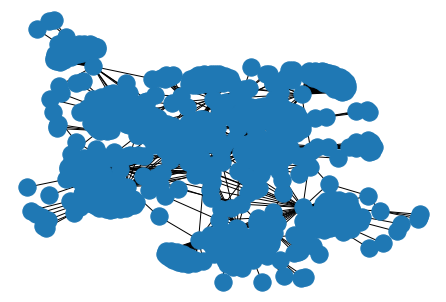

In [18]:
with open('toy-kg.tsv') as f:
    rd = f.read()
f.close()
rd = rd.split('\n')
for row in rd:
    row = row.lower().rstrip('\t').split('\t')
    G.append_to_graph(row)
G.draw_graph()

In [3]:
 model = gensim.models.KeyedVectors.load_word2vec_format('model.bin')

In [7]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words("english")

In [14]:

def get_similar_triple( query_relation, kg_triple_list):
    vocab = model.vocab.keys()
    similarity_max = 0
    triple_max = None
    for triple in kg_triple_list:
        relation = triple[2].get('data', ' ')
        relation = relation.split(" ") if ' ' in relation else [relation]
        relation = [w for w in relation if w in vocab and (w not in all_stopwords)]
        query =  [w for w in query_relation.split(" ") if (w in vocab) and (w not in all_stopwords)]
        # print(relation)
        # print(query)
        # if (set(relation).issubset(vocab.keys())) and (set(query_relation.split(" ")).issubset(vocab.keys())):
        #     print("here")
        similarity = model.wv.n_similarity(relation, query) if relation and query else 0
        # print(similarity)
        # else:
        #     similarity = 0
        if similarity > similarity_max:
            similarity_max = similarity
            triple_max = triple
        # break
    return (triple_max, similarity_max)

In [19]:
triple = None
similarity_max = 0
for entity in G.node_disambiguation(ent):
    print(entity)
    kg_relation = G.get_node_relation(entity)
    # print(kg_relation)
    one_hope_answer = get_similar_triple(query_relation, kg_relation)
    print(one_hope_answer)
    # similarity = one_hope_answer[1]
    # if similarity > similarity_max:
    #     similarity_max = similairy
    #     triple = one_hope_answer[0]
print(triple)

None


In [25]:
nodes = G.graph.nodes
node_list = []
query_entity = str(ent)
for node in G.graph.nodes:
    if len(node.split(" ")) == 2 and node.split(" ")[1] == query_entity:
        node_list.append(node)
if len(node_list) == 0:
    node_list.append(query_entity)

In [27]:
node_list

['tom hanks']